In [46]:
!pip install pandas
!pip install numpy
!pip install seaborn

In [47]:
# Model Import Statements
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 

# Visualisation Import Statements
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [48]:
# Read Dataset
df = pd.read_csv('dataset_processed.csv')

# Split Dataframe into Features and Target

x = df.drop(['Outcome', 'id', 'profit_2', 'profit_x','odds_ft_x', 'odds_ft_2'], axis=1) #Features
y = df['Outcome']

# Split Dataframe into Train and Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
# Initialize Random Forest model with specified hyperparameters

rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train model on the training data
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [50]:
# Make predictions on the test data using the trained model
predictions = rf.predict(x_test)

# Calculate the accuracy of the model on the test data
acc = accuracy_score(predictions, y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.759799255862248


Visualizing Model + Quantitative Metrics

In [51]:
# Visualizations
cm = confusion_matrix(predictions, y_test)
class_report = classification_report(predictions, y_test)

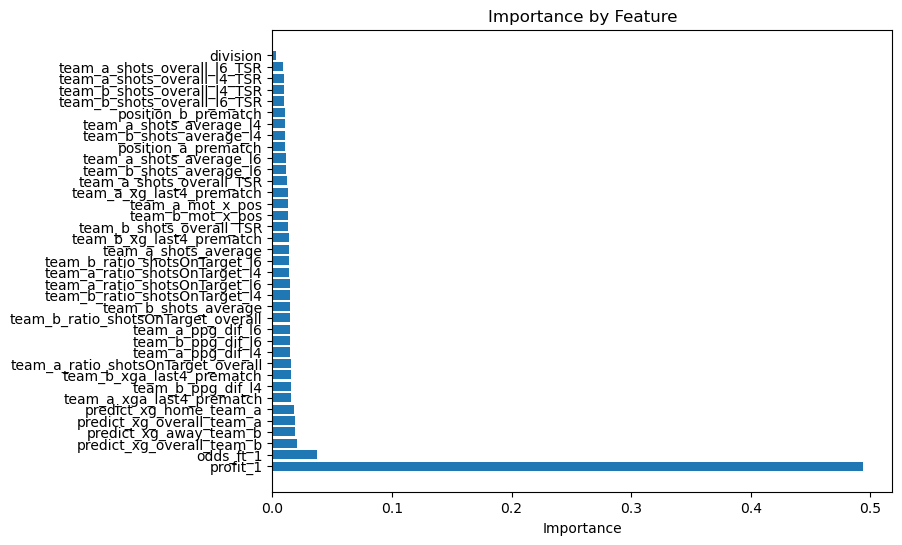

In [52]:
feature_importance = rf.feature_importances_ #importances for each feature saved by random forest
features = x_train.columns #features are columns from x
idxs = np.argsort(feature_importance)[::-1] #flip importance - most important first

#now plot features

plt.figure(figsize=(8,6))
plt.barh(range(len(features)), feature_importance[idxs], align='center')
plt.yticks(range(len(features)), np.array(features)[idxs])
plt.xlabel('Importance')
plt.title('Importance by Feature')
plt.show()

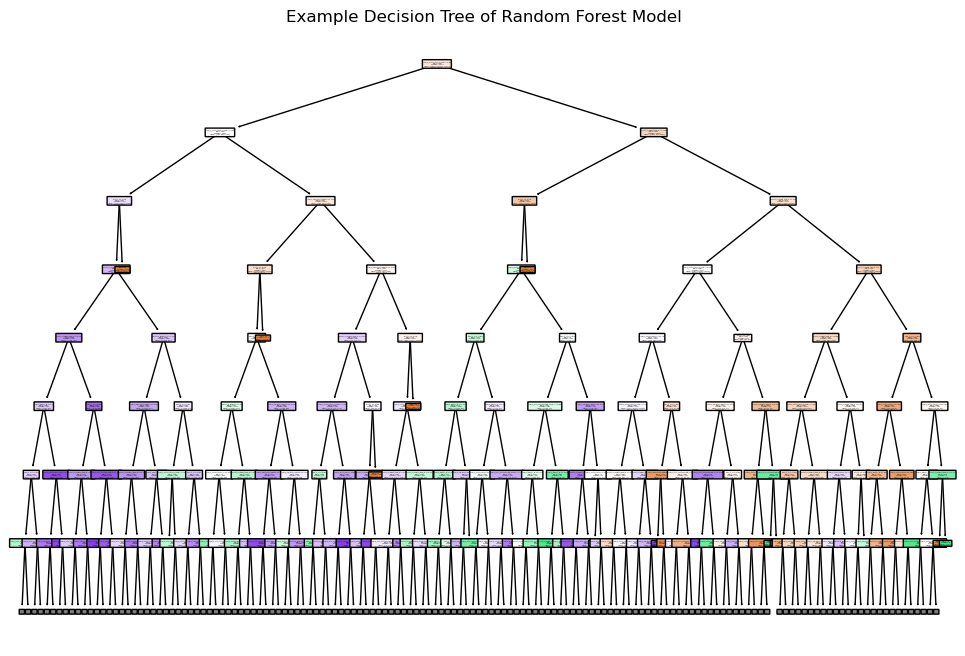

In [53]:
#visualizing a decision tree

plt.figure(figsize=(12,8)) 
plot_tree(rf.estimators_[0], filled=True, max_depth = 7, feature_names=features, class_names=['Class 0', 'Class 1', 'Class 2'], rounded=True)
#set max_depth, full tree was too large
plt.title('Example Decision Tree of Random Forest Model')
plt.show()

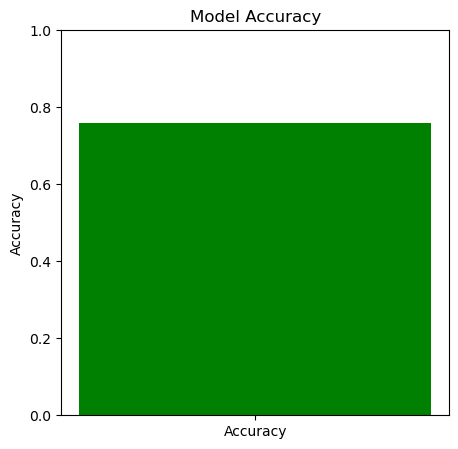

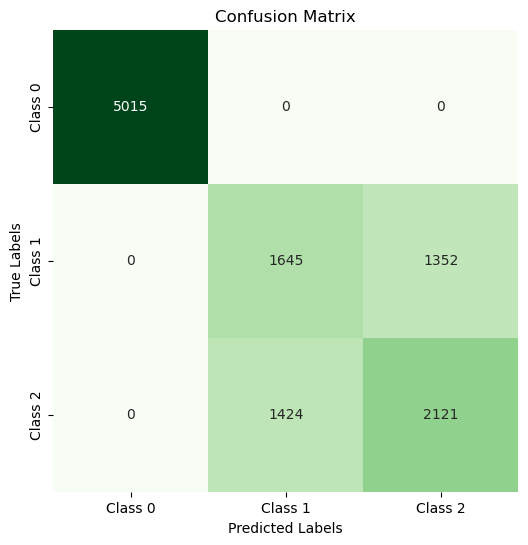

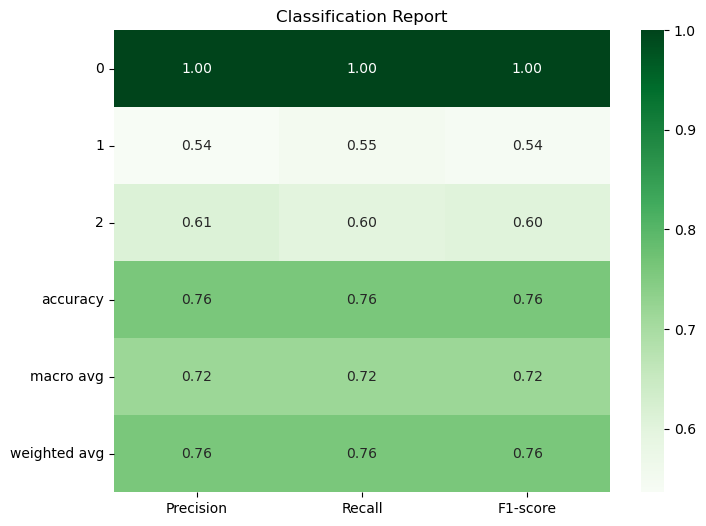

In [54]:
#accuracy
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [acc], color='Green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

#cm

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#class report

class_report = classification_report(predictions, y_test, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose().iloc[:, :-1]

plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.astype(float), annot=True, cmap='Greens', cbar=True, fmt='.2f', 
            xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=class_report_df.index)
plt.title('Classification Report')
plt.show()

